In [ ]:
# Install libraries (if needed)
!pip install matplotlib seaborn scikit-learn --quiet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for clarity
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create DataFrame for plotting
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['target'] = y

# Check explained variance
print("Explained variance ratio (by LDA components):", lda.explained_variance_ratio_)


Explained variance ratio (by LDA components): [0.9912126 0.0087874]


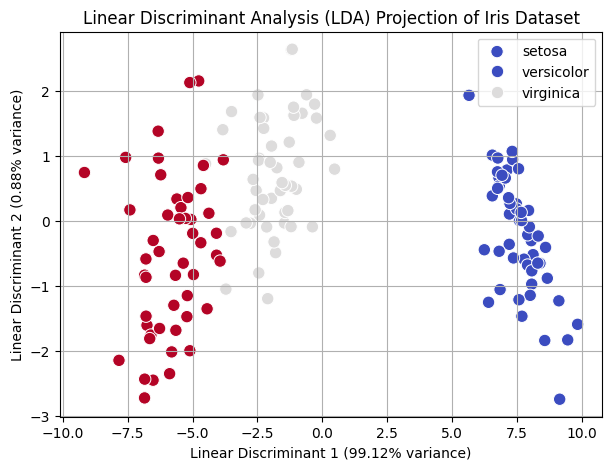

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='LD1', y='LD2', hue='target',
    data=df_lda, palette='coolwarm', s=80
)
plt.title('Linear Discriminant Analysis (LDA) Projection of Iris Dataset')
plt.xlabel(f"Linear Discriminant 1 ({lda.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Linear Discriminant 2 ({lda.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend(target_names)
plt.grid(True)
plt.show()
